In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [124]:
df = pd.read_csv("mymoviedb.csv", lineterminator='\n')


In [125]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [127]:
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [128]:
df.duplicated().sum()

np.int64(0)

In [129]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [130]:
df["Release_Date"]=pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtypes)

datetime64[ns]


In [131]:
# Exploration summary
# we have a dataframe consisting of 9827 rows and 9 columns.
#  ur dataset looks a bit tidy with no NaNs nor duplicated values. 
# Release Date column needs to be casted into date time and to extract only the Overview, Original Languege and Poster-Url wouldn't be so useful.
#  during analys there is noticable outliers in Popularity column Vote Average bettter be categorised for proper analysis. 
# Genre column has comma saperated values and white spaces that needs to be hand

In [132]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [133]:
# droping the columns

colm = ['Overview','Original_Language','Poster_Url']
df.drop(colm, axis=1 ,inplace=True)

In [134]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# Categorize Vote_Average_columns
# we would cut the Vote_Average values and make 4 categories popular, average, below_average, not_popular to describe it more using categorise_colm()functioin provided above.

In [135]:
def categorize_colm(df, colm, labels):
    desc = df[colm].describe()
    
    edges = [desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']]
    
    df[colm + '_category'] = pd.cut(df[colm], bins=edges, labels=labels, duplicates='drop')
    
    return df


In [136]:

print(df.columns)


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


In [137]:
labels = ['not_popular', 'below_average', 'average', 'popular']
df = categorize_colm(df, 'Vote_Average', labels)

print(df.columns)

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Vote_Average_category'],
      dtype='object')


In [138]:
print(df['Vote_Average_category'].unique())

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']


In [139]:
df['Vote_Average_category'].value_counts()


Vote_Average_category
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

In [140]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_category    0
dtype: int64

In [141]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller,below_average
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


# we did split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [142]:
df['Genre'] = df['Genre'].str.split(', ')     # assign the split result back
df = df.explode('Genre').reset_index(drop=True)  # explode and reset index
df.head()



,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime,popular
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery,popular


In [143]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Release_Date           25552 non-null  datetime64[ns]
 1   Title                  25552 non-null  object        
 2   Popularity             25552 non-null  float64       
 3   Vote_Count             25552 non-null  int64         
 4   Vote_Average           25552 non-null  float64       
 5   Genre                  25552 non-null  object        
 6   Vote_Average_category  25552 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [144]:
# DATA VISUALISATION

sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [145]:
df['Genre'].describe

<bound method NDFrame.describe of 0                 Action
1              Adventure
2        Science Fiction
3                  Crime
4                Mystery
              ...       
25547              Drama
25548            History
25549                War
25550              Drama
25551    Science Fiction
Name: Genre, Length: 25552, dtype: object>

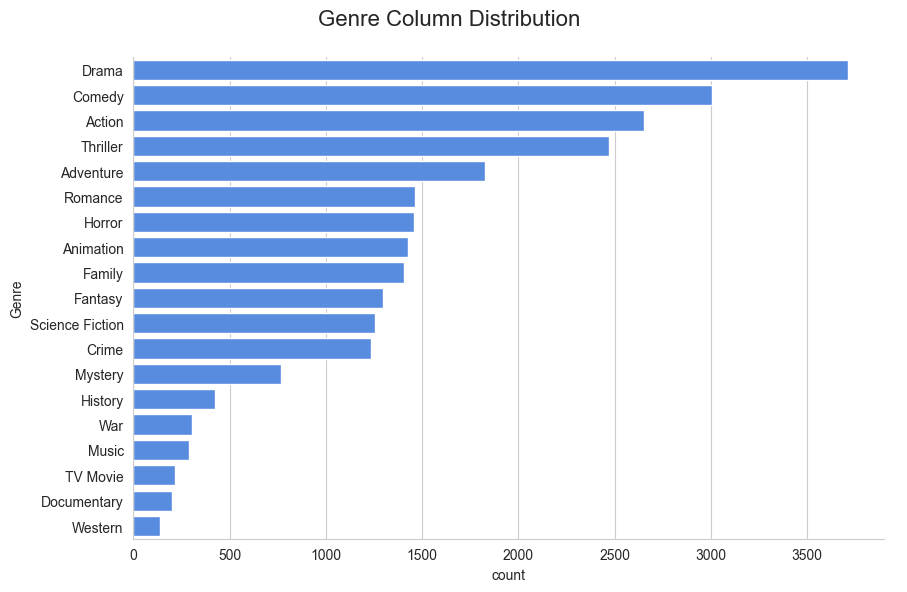

In [146]:
g = sns.catplot(
    y='Genre',
    data=df,
    kind='count',
    order=df['Genre'].value_counts().index,
    color='#4287f5',  # Set bar color
    height=6,
    aspect=1.5
)

# Set the overall title
g.fig.suptitle("Genre Column Distribution", fontsize=16)

# Adjust layout to fit title
g.fig.subplots_adjust(top=0.9)

plt.show()

# which has the highest vote in vote avg category column?

In [147]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime,popular
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery,popular


/var/folders/s5/v6sgvnps2vd9ll1297yz89qm0000gn/T/ipykernel_9335/2914968268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


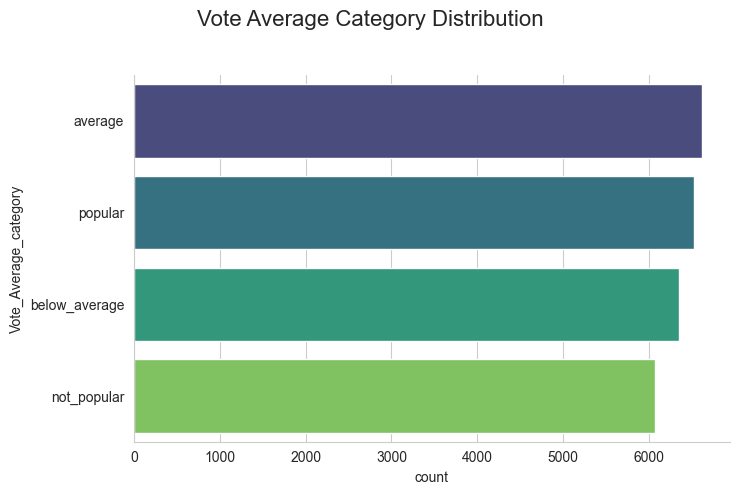

In [148]:


# Horizontal count plot
g = sns.catplot(
    y='Vote_Average_category',                  # Horizontal categories
    data=df,
    kind='count',
    order=df['Vote_Average_category'].value_counts().index,
    palette='viridis',
    height=5,
    aspect=1.5
)

# Title and layout adjustments
g.fig.suptitle("Vote Average Category Distribution", fontsize=16)
g.fig.subplots_adjust(top=0.85)

# Show the plot
plt.show()



# Which movie get the highest popularity? What is its genre ?

In [149]:
df[df['Popularity'] == df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular


# Whaat movie got the lowest popularity? What's its genre?

In [150]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,Music,average
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,History,average
25549,1984-09-23,Threads,13.354,186,7.8,War,popular
25550,1984-09-23,Threads,13.354,186,7.8,Drama,popular
25551,1984-09-23,Threads,13.354,186,7.8,Science Fiction,popular


# Which year is the most filmed movies?

In [151]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')


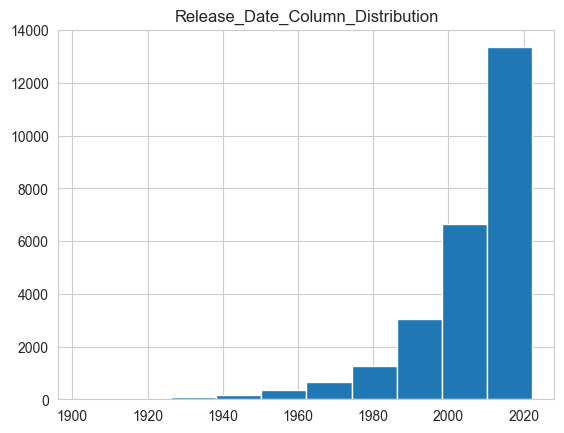

In [152]:
df['Release_Date'].hist()
plt.title('Release_Date_Column_Distribution')
plt.show()

 <!-- Conclusion -->

# Q1: What is the most frequent genre in the dataset?

# Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

# Q2: What genres has highest votes ?

# we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies popularities.

# Q3: What movie got the highest popularity? what's its genre ?

# Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.

# Q3: What movie got the lowest popularity? what's its genre?

# The united states, thread has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history.

# Q4: Which year has the most filmmed movies?

# year 2020 has the highest filmming rate in our dataset.